In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="content/mnist",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="content/mnist",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting content/mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to content/mnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting content/mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to content/mnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting content/mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to content/mnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting content/mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to content/mnist/FashionMNIST/raw



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


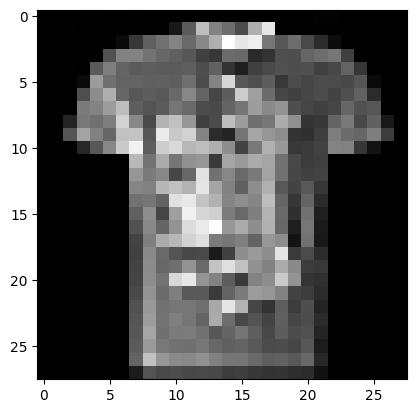

Label: 0


In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="content/mnist",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [2]:

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [25]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [34]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [46]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7], device='cuda:0')


In [49]:
input_image = torch.rand(3,28,28)
print(input_image.size())
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 28, 28])
torch.Size([3, 784])


In [51]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [53]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[1.9682e-01, 0.0000e+00, 2.4959e-01, 3.7983e-04, 5.1515e-01, 0.0000e+00,
         5.4102e-01, 1.3123e-01, 3.3201e-01, 0.0000e+00, 7.8645e-03, 3.4106e-01,
         0.0000e+00, 1.8910e-01, 2.5196e-01, 0.0000e+00, 0.0000e+00, 3.3459e-01,
         0.0000e+00, 0.0000e+00],
        [5.6090e-01, 0.0000e+00, 8.5249e-02, 0.0000e+00, 4.7450e-01, 0.0000e+00,
         2.9193e-01, 1.8693e-01, 5.5733e-01, 1.0912e-02, 0.0000e+00, 2.3032e-01,
         0.0000e+00, 4.2638e-01, 2.6310e-01, 0.0000e+00, 0.0000e+00, 3.5820e-01,
         0.0000e+00, 1.3286e-01],
        [5.5051e-01, 0.0000e+00, 2.1652e-01, 0.0000e+00, 1.9552e-01, 0.0000e+00,
         0.0000e+00, 1.3215e-01, 5.5015e-01, 1.8538e-02, 0.0000e+00, 1.2313e-01,
         0.0000e+00, 6.4172e-02, 1.3936e-01, 0.0000e+00, 7.4892e-03, 3.8634e-01,
         0.0000e+00, 0.0000e+00]], grad_fn=<ReluBackward0>)


After ReLU: tensor([[1.9682e-01, 0.0000e+00, 2.4959e-01, 3.7983e-04, 5.1515e-01, 0.0000e+00,
         5.4102e-01, 1.3123e-01, 3.

In [57]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.0982, 0.0825, 0.1052, 0.1139, 0.1242, 0.0930, 0.1024, 0.0771, 0.1048,
         0.0987],
        [0.1094, 0.0782, 0.1099, 0.1153, 0.1109, 0.1042, 0.0993, 0.0778, 0.1039,
         0.0911],
        [0.1128, 0.0860, 0.1114, 0.1065, 0.0973, 0.0830, 0.1111, 0.0772, 0.1070,
         0.1074]], grad_fn=<SoftmaxBackward0>)

In [60]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f7e9d267550>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f7ea83b7c40>


In [66]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

learning_rate = 1e-3
batch_size = 64
epochs = 5


training_data = datasets.FashionMNIST(
    root="content/mnist",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="content/mnist",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [68]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.795716  [    0/60000]
loss: 0.877979  [ 6400/60000]
loss: 0.636990  [12800/60000]
loss: 0.834962  [19200/60000]
loss: 0.745807  [25600/60000]
loss: 0.731235  [32000/60000]
loss: 0.818525  [38400/60000]
loss: 0.792515  [44800/60000]
loss: 0.796719  [51200/60000]
loss: 0.770926  [57600/60000]
Test Error: 
 Accuracy: 71.7%, Avg loss: 0.763758 

Epoch 2
-------------------------------
loss: 0.757785  [    0/60000]
loss: 0.848109  [ 6400/60000]
loss: 0.605129  [12800/60000]
loss: 0.809966  [19200/60000]
loss: 0.723448  [25600/60000]
loss: 0.705426  [32000/60000]
loss: 0.792805  [38400/60000]
loss: 0.776183  [44800/60000]
loss: 0.774987  [51200/60000]
loss: 0.749445  [57600/60000]
Test Error: 
 Accuracy: 72.7%, Avg loss: 0.741270 

Epoch 3
-------------------------------
loss: 0.724959  [    0/60000]
loss: 0.821403  [ 6400/60000]
loss: 0.578189  [12800/60000]
loss: 0.788846  [19200/60000]
loss: 0.704113  [25600/60000]
loss: 0.684305  [32000/600